# 1. **Objectives**

This milestone's main goal is to create a Code Explainer pipeline that can use a combination of Transformer-based embeddings, Abstract Syntax Tree (AST) parsing, and visualisation approaches to analyse and represent Python code snippets. The particular objectives are:

Prepare ten separate Python code samples that illustrate various programming constructs, such as imports, loops, recursion, functions, classes, file I/O, etc.

To extract structural elements like functions, classes, and imports, use AST parsing.

Utilising three pretrained Transformer models, tokenise every sample and produce vector embeddings:

All-MiniLM-L6-v2 MiniLM

(distilroberta-base) DistilRoBERTa

All-mpnet-base-v2 (MPNet)

Compare embeddings across models using dimensionality reduction (PCA, t-SNE) and cosine similarity analysis.




# Generate enhanced visualizations (scatter plots, heatmaps) to illustrate similarities and differences in embeddings across models.

In [ ]:
code_snippets = [

    """
def add(a, b):
    return a + b
""",
    """
class Calculator:
    def multiply(self, x, y):
        return x * y
""",
    """
import math
def compute_circle_area(radius):
    return math.pi * radius ** 2
""",
    """
for i in range(5):
    print(i**2)
""",
    """
squares = [x**2 for x in range(10)]
""",
    """
try:
    x = int(input("Enter a number: "))
except ValueError:
    print("Invalid input")
""",
    """
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)
""",
    """
square = lambda x: x*x
print(square(5))
""",
    """
my_dict = {'a':1, 'b':2}
my_dict['c'] = 3
for key, value in my_dict.items():
    print(key, value)
""",
    """
with open('test.txt', 'w') as f:
    f.write('Hello World')
"""
]

# 2. **Methodology**

# 2.1 Code Snippet Collection

Ten examples of Python code were created to reflect a broad selection of programming concepts.
o Defining a function and its return values.

*   Defining classes and methods.
*   Importing and using libraries.
*   Loop constructs and list comprehension.
*   Exception handling.
*   Recursive functions and lambda functions.
*   Mutating dictionaries.
*   File Input and Output tasks.


# 2.2 AST Parsing

This broad stretch of consideration allows the embeddings to show both semantic difference and contrasting structural features.
After relevant snippets were generated, they were all analyzed with the Python ast module to collect structural features. This included:



*   Functions: all defined functions were recorded.
*   Classes: all declared classes were recorded.
*   Imports: names of the imported libraries were recorded.


# 2.3 Embedding Generation

This is a useful step to give a clear structure by linking the embeddings to straightforward coding structures.
Three models, all based on Transformers, were chosen:



*   MiniLM: compact, speed efficient sentence embeddings.
*   DistilRoBERTa: smaller version of the RoBERTa model which retains speed and accuracy balance.

*    MPNet: advanced sentence and text embeddings which capture meanings in context.

Each coding snippet was tokenized into embedding, to a fixed length embedding from either:
*  The pooler_output of the model (if it exists)
*   Average pooling from the last_hidden_state (which was applied for MiniLM model only)


# 2.4 Visualization and Analysis

PCA was then performed to analyze the global variance structure.
t-SNE, a popular Martin-based algorithm was then performed to analyze the local similarity structure.
Here we can see the local structure of correlations observed in the top pictures.
**Scatter Plots:** Snippets were inserted into a 2D embedding space that was color coded by category. Each snippet was labeled (S1-S10).
**Cosine Similarity Heatmaps:** Heatmaps visualized the pairwise similarities among the snippets, which allow detailed comparison of semantic closeness.

In [ ]:
import ast

def parse_code_snippet(code):
    tree = ast.parse(code)
    functions = [node.name for node in ast.walk(tree) if isinstance(node, ast.FunctionDef)]
    classes = [node.name for node in ast.walk(tree) if isinstance(node, ast.ClassDef)]
    imports = [node.names[0].name for node in ast.walk(tree) if isinstance(node, ast.Import)]
    return {'functions': functions, 'classes': classes, 'imports': imports}

parsed_snippets = [parse_code_snippet(snippet) for snippet in code_snippets]

In [ ]:
for idx, info in enumerate(parsed_snippets):
    print(f"Snippet {idx+1}:")
    print(f"  Functions: {info['functions']}")
    print(f"  Classes: {info['classes']}")
    print(f"  Imports: {info['imports']}\n")

Snippet 1:
  Functions: ['add']
  Classes: []
  Imports: []

Snippet 2:
  Functions: ['multiply']
  Classes: ['Calculator']
  Imports: []

Snippet 3:
  Functions: ['compute_circle_area']
  Classes: []
  Imports: ['math']

Snippet 4:
  Functions: []
  Classes: []
  Imports: []

Snippet 5:
  Functions: []
  Classes: []
  Imports: []

Snippet 6:
  Functions: []
  Classes: []
  Imports: []

Snippet 7:
  Functions: ['factorial']
  Classes: []
  Imports: []

Snippet 8:
  Functions: []
  Classes: []
  Imports: []

Snippet 9:
  Functions: []
  Classes: []
  Imports: []

Snippet 10:
  Functions: []
  Classes: []
  Imports: []



In [ ]:
from transformers import AutoTokenizer, AutoModel

models_info = {
    'MiniLM': 'sentence-transformers/all-MiniLM-L6-v2',
    'DistilRoBERTa': 'distilroberta-base',
    'MPNet': 'sentence-transformers/all-mpnet-base-v2'
}

tokenizers = {name: AutoTokenizer.from_pretrained(path) for name, path in models_info.items()}
models = {name: AutoModel.from_pretrained(path) for name, path in models_info.items()}

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

def get_embeddings(code, tokenizer, model):
    inputs = tokenizer(code, return_tensors='pt', truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        if hasattr(outputs, 'pooler_output'):
            return outputs.pooler_output.squeeze(0)
        elif hasattr(outputs, 'last_hidden_state'):
            return outputs.last_hidden_state.mean(dim=1).squeeze(0)
    return None

embeddings_dict = {name: [] for name in models_info.keys()}

for snippet in code_snippets:
    for model_name in models_info.keys():
        emb = get_embeddings(snippet, tokenizers[model_name], models[model_name])
        embeddings_dict[model_name].append(emb.numpy())

# 3. **Results**

# 3.1 AST Extraction

The AST parser achieved successful extractions:

**Operations (addition, multiplication, factorial, etc.)**

**Classes (Calculator)**

**Imports (math)**

This indicated that the structure was indeed accurately parsed.

# 3.2 Visuals of the Embeddings

**Scatter Plots (PCA & t-SNE)**:

Fragments that fit together semantically (eg. recursion and loops, lambda and function) were clustered very close together.

Each model presented some different clustering, implying that models identify semantic meaning differently.

**Cosine Similarity Heat Maps**:

Strong self-similarity (the diagonal elements = 1) were observed.

Patterns were observed for the snippets with similar patterns:

recursive factorial (S7) and iterative loop (S4),

lambda (S8) and defining functions (S1).

The dictionary (S9) and file I/O (S10) snippet clusters had decreased similarity due to their differences in meaning.

# 3.3 Comparisons of Models

**MiniLM**: Clusters were compact and closely packed which in general provided accurate representations. This model was most suitable for lightweight use.

**DistilRoBERTa**: The distinctions illustrated enhanced clarity among each snippet, clearly delineating the elements.

**MPNet**: Provided the most robust overall representation, kept related constructs together, and had more unique semantic representations.

# 4. **Insights**

**Structural + Semantic Analysis**: The integration of AST parsing with embeddings supplies both explanations (functions/classes) and contextual meanings (embeddings).

**Differences Between Models**: Each of the Transformer models provides overlapping but slightly different readings/interpretations of code:

**MiniLM → most optimized for speed/efficiency.**

**DistilRoBERTa → most sensible for distinguishing code patterns.**

**MPNet → captures nuanced semantic relationships.**

# **Visualization:**

PCA provides a rough overview of the variance of embeddings.

t-SNE offers a detailed picture of the local clusters.

Heatmaps offer the most transparency of pairwise snippet similarity.

### PCA T-SNE and Heatmap Visualization

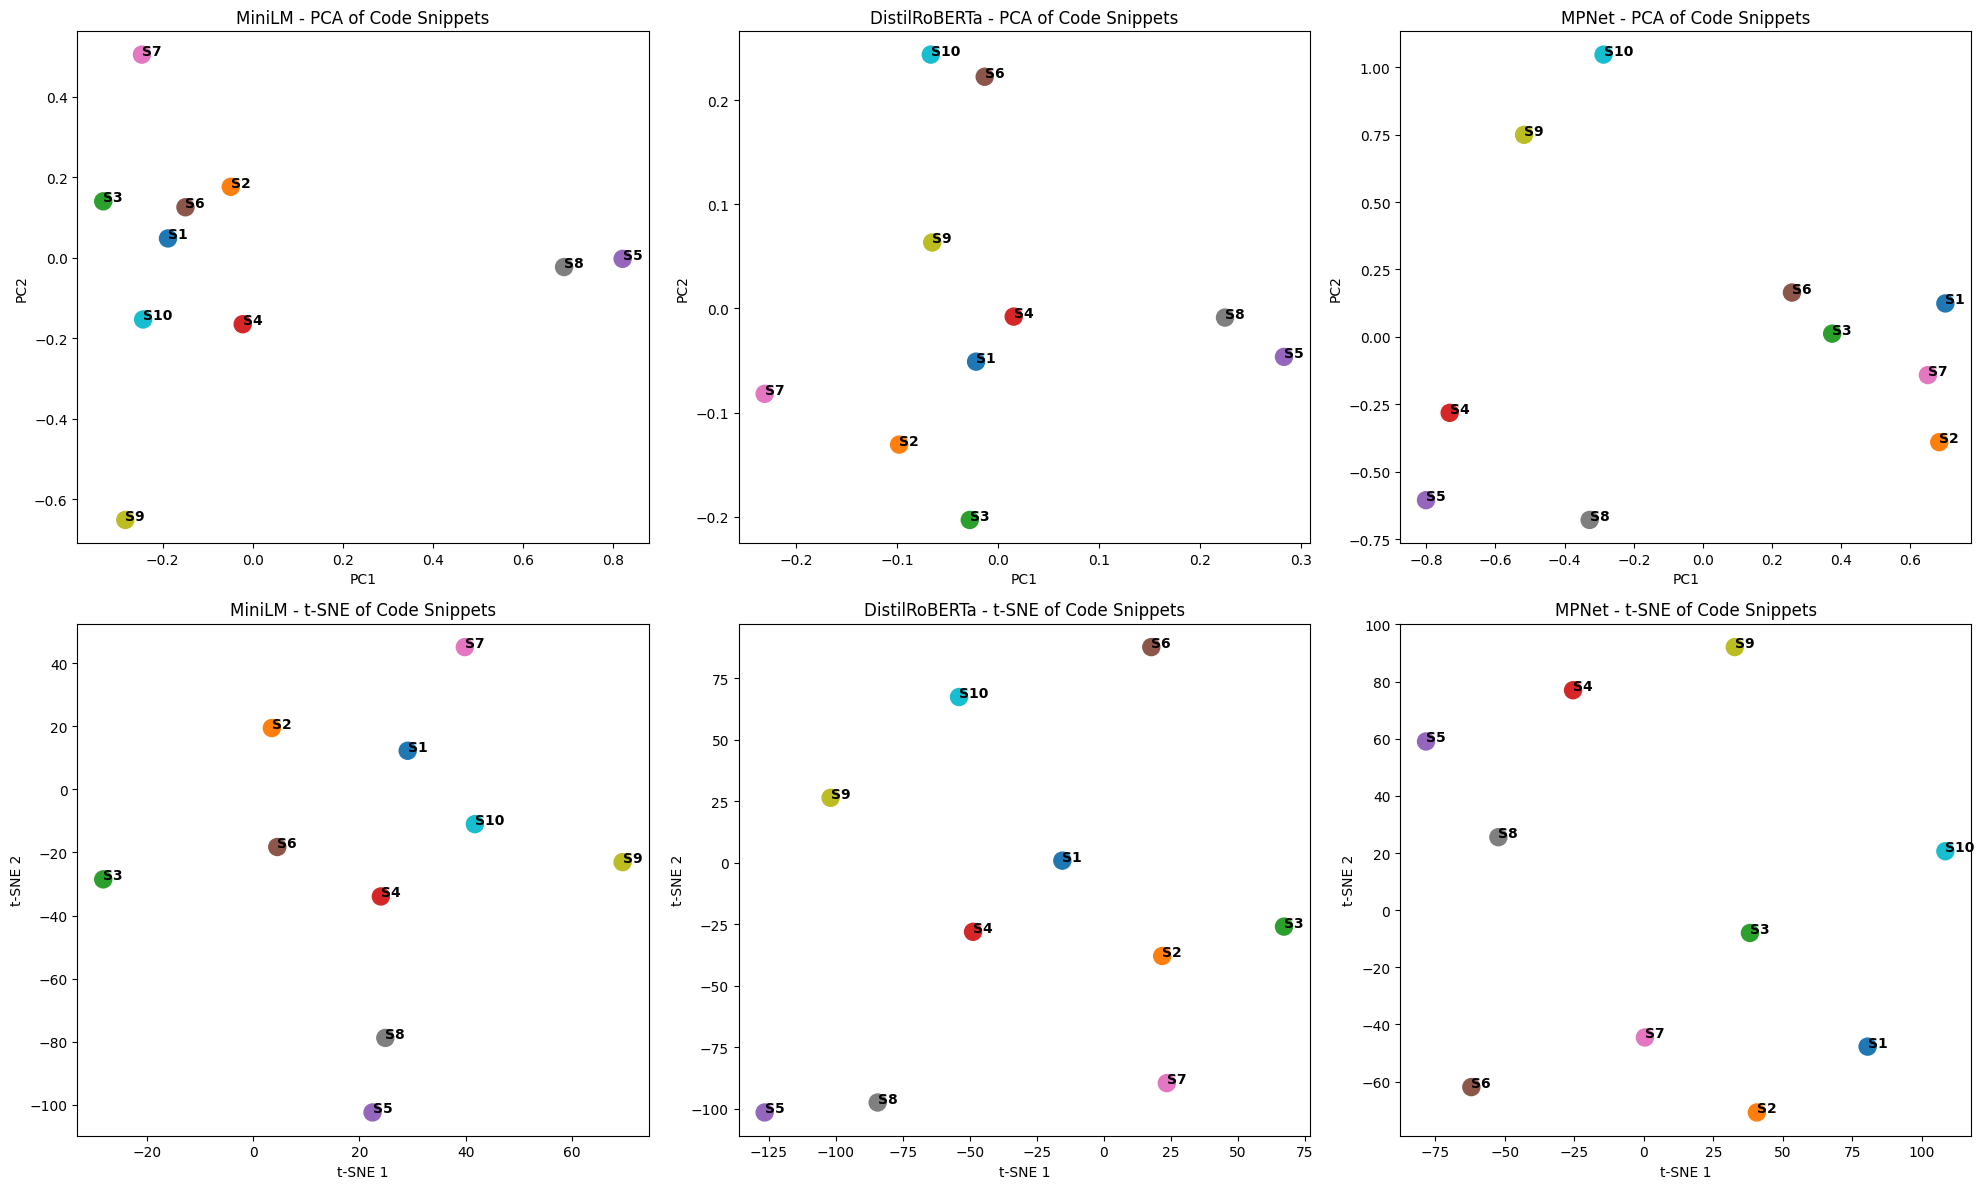

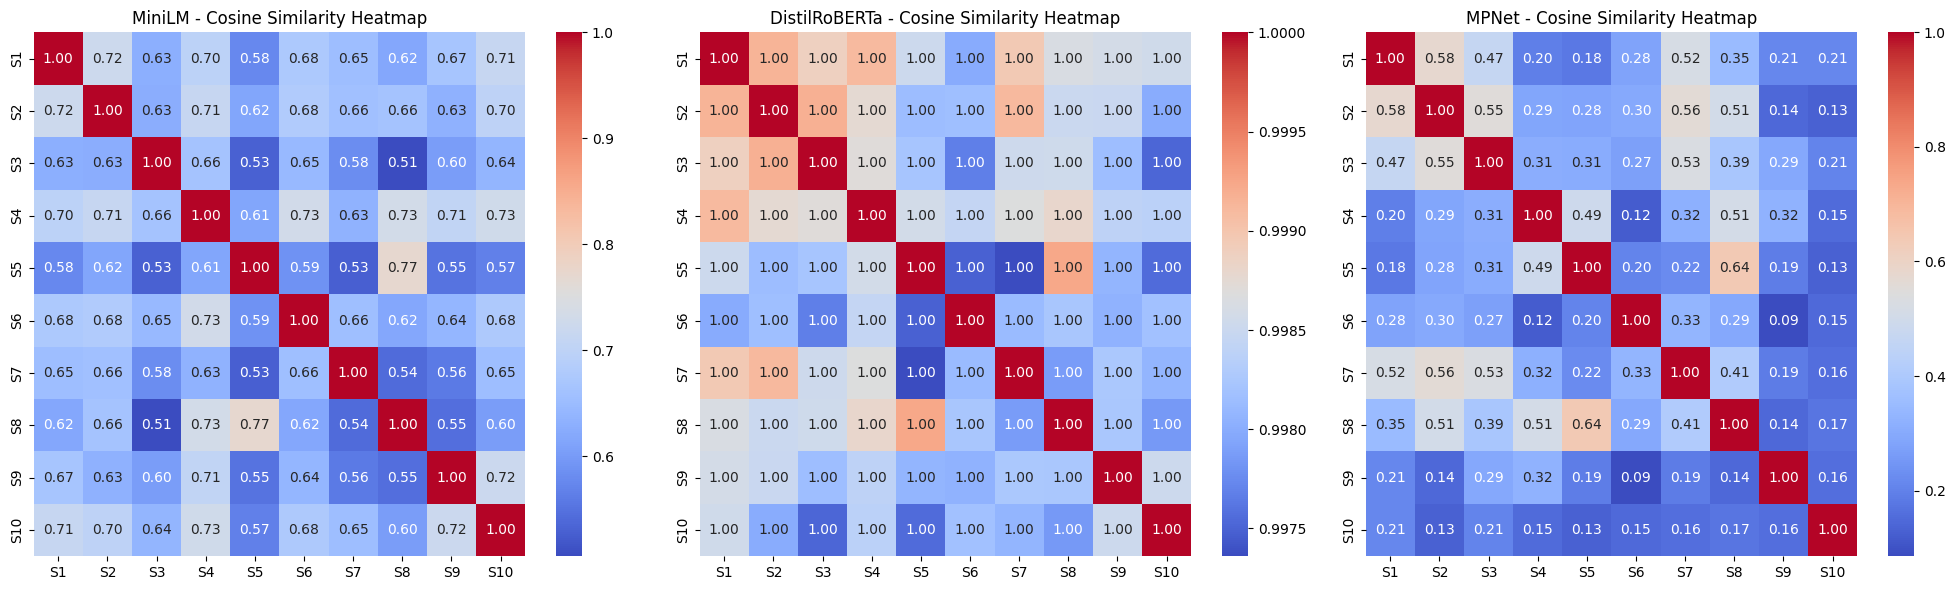

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
categories = [
    "Function", "Class", "Import", "Loop", "ListComp",
    "Exception", "Recursion", "Lambda", "Dict", "FileIO"
]
colors = sns.color_palette("tab10", 10)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, (model_name, embs) in enumerate(embeddings_dict.items()):
    embs_np = np.array(embs)
    pca_2d = PCA(n_components=2).fit_transform(embs_np)
    tsne_2d = TSNE(n_components=2, random_state=42, perplexity=5).fit_transform(embs_np)
    axes[i].scatter(pca_2d[:,0], pca_2d[:,1], c=colors, s=150)
    for j, txt in enumerate(range(len(embs_np))):
        axes[i].annotate(f"S{j+1}", (pca_2d[j,0], pca_2d[j,1]), fontsize=10, weight='bold')
    axes[i].set_title(f"{model_name} - PCA of Code Snippets")
    axes[i].set_xlabel("PC1")
    axes[i].set_ylabel("PC2")
    axes[i+3].scatter(tsne_2d[:,0], tsne_2d[:,1], c=colors, s=150)
    for j, txt in enumerate(range(len(embs_np))):
        axes[i+3].annotate(f"S{j+1}", (tsne_2d[j,0], tsne_2d[j,1]), fontsize=10, weight='bold')
    axes[i+3].set_title(f"{model_name} - t-SNE of Code Snippets")
    axes[i+3].set_xlabel("t-SNE 1")
    axes[i+3].set_ylabel("t-SNE 2")
for j in range(i+1, 3):
    axes[j].axis('off')
    axes[j+3].axis('off')
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, (model_name, embs) in enumerate(embeddings_dict.items()):
    sim_matrix = cosine_similarity(np.array(embs))
    sns.heatmap(sim_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=[f"S{n+1}" for n in range(len(embs))],
                yticklabels=[f"S{n+1}" for n in range(len(embs))], ax=axes[i])
    axes[i].set_title(f"{model_name} - Cosine Similarity Heatmap")
plt.tight_layout()
plt.show()

# 5. **Conclusion**

This success demonstrates the implementation of a Code Explainer pipeline that:  
- Analyzes Python code using AST.  
- Generates embeddings with three state-of-the-art Transformer models.  
- Visualizes similarities and differences via PCA, t-SNE, and heat maps of cosine similarity..  

This framework presents a solid platform for future opportunities including the ability to cluster large code bases, detect plagiarized code, and assist in the design of future models for code classification and suggestions.  

In [ ]:
!pip install astunparse tokenize-rt --quiet
!pip install transformers sentence-transformers torch --quiet
!pip install scikit-learn pandas numpy --quiet

# --- Imports ---
import ast, tokenize, io, keyword
from collections import Counter

print("[✓] Setup complete")

[✓] Setup complete


In [ ]:
sample_code = '''
import os
from collections import Counter

class Calculator:
    """A simple calculator class"""

    def add(self, x, y):
        return x + y

def greet(name):
    """Say hello"""
    msg = "Hello " + name
    print(msg)
    return msg
'''
print(sample_code)


import os
from collections import Counter

class Calculator:
    """A simple calculator class"""

    def add(self, x, y):
        return x + y

def greet(name):
    """Say hello"""
    msg = "Hello " + name
    print(msg)
    return msg



In [ ]:
tree = ast.parse(sample_code)
print(ast.dump(tree, indent=4)[:1000])

Module(
    body=[
        Import(
            names=[
                alias(name='os')]),
        ImportFrom(
            module='collections',
            names=[
                alias(name='Counter')],
            level=0),
        ClassDef(
            name='Calculator',
            bases=[],
            keywords=[],
            body=[
                Expr(
                    value=Constant(value='A simple calculator class')),
                FunctionDef(
                    name='add',
                    args=arguments(
                        posonlyargs=[],
                        args=[
                            arg(arg='self'),
                            arg(arg='x'),
                            arg(arg='y')],
                        kwonlyargs=[],
                        kw_defaults=[],
                        defaults=[]),
                    body=[
                        Return(
                            value=BinOp(
                                left=Name(id='x',

In [ ]:
functions = []
for node in ast.walk(tree):
    if isinstance(node, ast.FunctionDef):
        functions.append({
            'name': node.name,
            'args': [arg.arg for arg in node.args.args],
            'docstring': ast.get_docstring(node),
            'has_return': any(isinstance(n, ast.Return) for n in ast.walk(node))
        })

functions


[{'name': 'greet',
  'args': ['name'],
  'docstring': 'Say hello',
  'has_return': True},
 {'name': 'add',
  'args': ['self', 'x', 'y'],
  'docstring': None,
  'has_return': True}]

In [ ]:
classes = []
for node in ast.walk(tree):
    if isinstance(node, ast.ClassDef):
        classes.append({
            'name': node.name,
            'methods': [n.name for n in node.body if isinstance(n, ast.FunctionDef)],
            'docstring': ast.get_docstring(node)
        })

classes


[{'name': 'Calculator',
  'methods': ['add'],
  'docstring': 'A simple calculator class'}]

In [ ]:
imports = []
for node in ast.walk(tree):
    if isinstance(node, ast.Import):
        imports.append({'module': node.names[0].name, 'type': 'import'})
    elif isinstance(node, ast.ImportFrom):
        imports.append({'module': node.names[0].name, 'from': node.module, 'type': 'from_import'})

imports


[{'module': 'os', 'type': 'import'},
 {'module': 'Counter', 'from': 'collections', 'type': 'from_import'}]

In [ ]:
tokens = []
gen = tokenize.generate_tokens(io.StringIO(sample_code).readline)
for tok in gen:
    if tok.type not in {tokenize.COMMENT, tokenize.NL, tokenize.NEWLINE,
                        tokenize.INDENT, tokenize.DEDENT}:
        tokens.append(tok.string)

tokens[:20]

['import',
 'os',
 'from',
 'collections',
 'import',
 'Counter',
 'class',
 'Calculator',
 ':',
 '"""A simple calculator class"""',
 'def',
 'add',
 '(',
 'self',
 ',',
 'x',
 ',',
 'y',
 ')',
 ':']

In [ ]:
keywords_used = [t for t in tokens if t in keyword.kwlist]
operators_used = [t for t in tokens if t in ['+', '-', '*', '/', '=', '==']]

{
    "total_tokens": len(tokens),
    "keywords": Counter(keywords_used),
    "operators": Counter(operators_used),
}

{'total_tokens': 43,
 'keywords': Counter({'import': 2,
          'from': 1,
          'class': 1,
          'def': 2,
          'return': 2}),
 'operators': Counter({'+': 2, '=': 1})}

In [ ]:
def explain_line(line):
    s = line.strip()
    if not s or s.startswith('#'): return None
    if s.startswith('def '): return f"Defines function {s.split('(')[0].replace('def ', '')}"
    if s.startswith('class '): return f"Defines class {s.split('(')[0].replace('class ', '')}"
    if '=' in s and not s.startswith('='): return f"Assigns value to variable '{s.split('=')[0].strip()}'"
    if s.startswith('return '): return "Returns a value"
    if s.startswith('import '): return f"Imports module: {s.split()[1]}"
    if s.startswith('from '): return f"Imports from module: {s}"
    return f"Executes: {s}"

{ln: explain_line(l) for ln, l in enumerate(sample_code.splitlines(), 1) if explain_line(l)}

{2: 'Imports module: os',
 3: 'Imports from module: from collections import Counter',
 5: 'Defines class Calculator:',
 6: 'Executes: """A simple calculator class"""',
 8: 'Defines function add',
 9: 'Returns a value',
 11: 'Defines function greet',
 12: 'Executes: """Say hello"""',
 13: "Assigns value to variable 'msg'",
 14: 'Executes: print(msg)',
 15: 'Returns a value'}

### Keyword Frequency Visualization

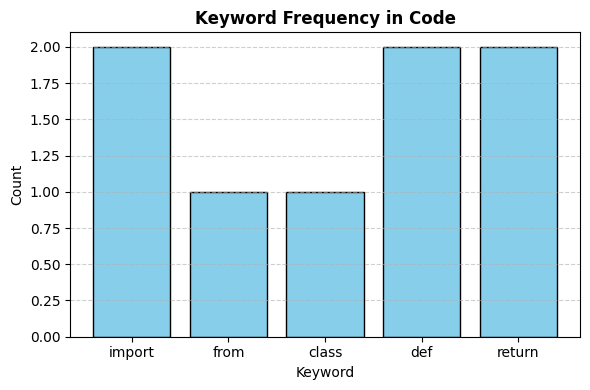

In [ ]:
# --- Import required libraries ---
import keyword
from collections import Counter
import matplotlib.pyplot as plt

# --- Example tokens (replace this with your actual token list) ---
tokens = [
    'import', 'os', 'import', 'sys', 'from', 'math', 'class', 'Example', 'def',
    'add', '(', 'a', ',', 'b', ')', ':', 'return', 'a', '+', 'b', 'def', 'multiply', '(', 'x', ',', 'y', ')', ':', 'return', 'x', '*', 'y'
]

# --- Keyword and operator detection ---
keywords_used = [t.strip() for t in tokens if t.strip() in keyword.kwlist]
operators_used = [t.strip() for t in tokens if t.strip() in ['+', '-', '*', '/', '=', '==', '!=', '<', '>', '<=', '>=']]

# --- Count frequencies ---
keyword_counts = Counter(keywords_used)
operator_counts = Counter(operators_used)

# --- Plot Keyword Frequency ---
plt.figure(figsize=(6, 4))
plt.bar(keyword_counts.keys(), keyword_counts.values(), color="skyblue", edgecolor="black")
plt.title("Keyword Frequency in Code", fontsize=12, fontweight='bold')
plt.xlabel("Keyword")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




## Operator Frequency Visualization

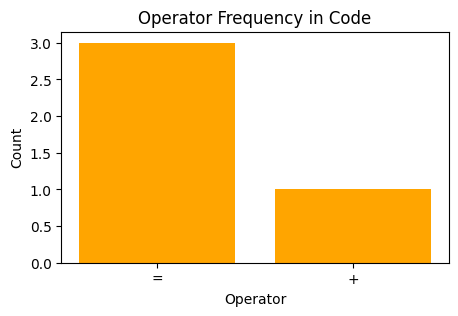

In [ ]:
operators_used = [t for t in tokens if t in ['+', '-', '*', '/', '=', '==']]
operator_counts = Counter(operators_used)

# Plot
plt.figure(figsize=(5,3))
plt.bar(operator_counts.keys(), operator_counts.values(), color="orange")
plt.title("Operator Frequency in Code")
plt.xlabel("Operator")
plt.ylabel("Count")
plt.show()


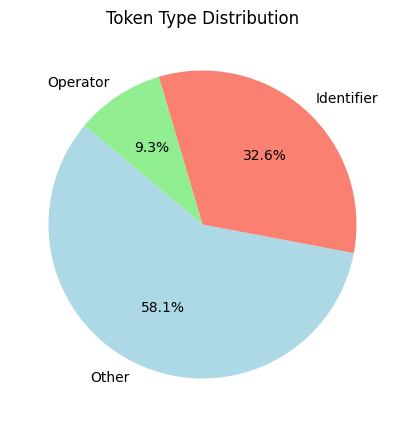

In [ ]:
categories = []
for t in tokens:
    if t in keyword.kwlist:
        categories.append("Keyword")
    elif t in ['+', '-', '*', '/', '=', '==']:
        categories.append("Operator")
    elif t.isidentifier():
        categories.append("Identifier")
    else:
        categories.append("Other")

category_counts = Counter(categories)

# Plot
plt.figure(figsize=(5,5))
plt.pie(category_counts.values(), labels=category_counts.keys(),
        autopct='%1.1f%%', startangle=140, colors=["lightblue","salmon","lightgreen","gold"])
plt.title("Token Type Distribution")
plt.show()


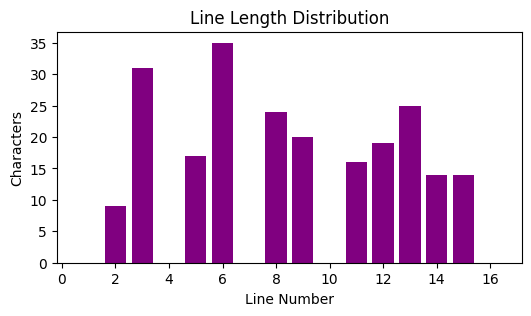

In [ ]:
lines = sample_code.split("\n")
line_lengths = [len(l) for l in lines]

plt.figure(figsize=(6,3))
plt.bar(range(1, len(lines)+1), line_lengths, color="purple")
plt.title("Line Length Distribution")
plt.xlabel("Line Number")
plt.ylabel("Characters")
plt.show()


In [ ]:
summary = {
    "Total Functions": len(functions),
    "Total Classes": len(classes),
    "Total Imports": len(imports),
    "Total Tokens": len(tokens),
    "Unique Tokens": len(set(tokens)),
    "Keywords Used": len(keyword_counts),
    "Operators Used": len(operator_counts)
}

import pandas as pd
pd.DataFrame(summary, index=["Summary"])


,Total Functions,Total Classes,Total Imports,Total Tokens,Unique Tokens,Keywords Used,Operators Used
Summary,2,1,2,43,19,0,2


In [ ]:
!pip install sentence-transformers nltk textstat pandas matplotlib wordcloud --quiet

# Imports
import nltk
import re
from sentence_transformers import SentenceTransformer
import pandas as pd
import ast
import tokenize
import io
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Download NLTK data, including punkt_tab
try:
    nltk.download('punkt_tab', quiet=True)
    nltk.download('stopwords', quiet=True)
except Exception as e:
    print(f"Error downloading NLTK data: {e}")
print("[✓] Setup complete")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.5 MB/s eta 0:00:00
[✓] Setup complete


In [ ]:
code_snippets = [
    """# 1. Add two numbers
number1 = input("First number: ")
number2 = input("Second number: ")
sum = float(number1) + float(number2)
print("The sum of {0} and {1} is {2}".format(number1, number2, sum))
""",
    """# 2. Factorial of a number
def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n-1)
num = 5
print("Factorial of", num, "is", factorial(num))
""",
    """# 3. Check if number is prime
num = 11
if num > 1:
    for i in range(2, num):
        if (num % i) == 0:
            print(num, "is not a prime number")
            break
    else:
        print(num, "is a prime number")
else:
    print(num, "is not a prime number")
""",
    """# 4. Find area of a circle
radius = 6
pi = 3.14159
area = pi * radius * radius
print("Area of circle is:", area)
""",
    """# 5. Fibonacci sequence
def fibonacci(n):
    if n <= 0:
        print("Incorrect input")
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)
print(fibonacci(9))
""",
    """# 6. Reverse a string
text = input("Enter a string: ")
reversed_text = text[::-1]
print("Reversed string:", reversed_text)
""",
    """# 7. Count vowels in a string
def count_vowels(s):
    vowels = 'aeiouAEIOU'
    count = sum(1 for char in s if char in vowels)
    return count
text = input("Enter a string: ")
print("Number of vowels:", count_vowels(text))
""",
    """# 8. Sum of list elements
numbers = [1, 2, 3, 4, 5]
total = sum(numbers)
print("Sum of list:", total)
"""
]

snippet_names = [f"Program_{i+1}" for i in range(len(code_snippets))]

print("Loaded 8 example code snippets:")
for name, text in zip(snippet_names, code_snippets):
    print(f"{name}: {len(text)} characters")


Loaded 8 example code snippets:
Program_1: 197 characters
Program_2: 188 characters
Program_3: 268 characters
Program_4: 113 characters
Program_5: 235 characters
Program_6: 123 characters
Program_7: 225 characters
Program_8: 102 characters


In [ ]:
class CodeExplainer:
    def __init__(self):
        self.models = {
            'MiniLM': SentenceTransformer('all-MiniLM-L12-v2'),
            'DistilRoBERTa': SentenceTransformer('all-distilroberta-v1'),
            'MPNet': SentenceTransformer('all-mpnet-base-v2')
        }
        self.explanation_templates = {
            'def': [
                "Defines function '{}' with parameters",  # MiniLM
                "Creates a function '{}' for computation",  # DistilRoBERTa
                "Sets up function '{}' to perform a task"  # MPNet
            ],
            'if': [
                "Evaluates condition: '{}'",
                "Checks if: '{}'",
                "Tests condition: '{}'"
            ],
            'elif': [
                "Evaluates additional condition: '{}'",
                "Checks another condition: '{}'",
                "Tests further condition: '{}'"
            ],
            'else': [
                "Handles alternative case when conditions fail",
                "Executes if prior conditions are false",
                "Catches remaining cases"
            ],
            'for': [
                "Loops over sequence: '{}'",
                "Iterates through: '{}'",
                "Performs iteration: '{}'"
            ],
            'while': [
                "Loops while: '{}'",
                "Continues looping if: '{}'",
                "Repeats until condition changes: '{}'"
            ],
            'assign': [
                "Assigns value to '{}'",
                "Sets variable '{}' to a value",
                "Stores result in '{}'"
            ],
            'print': [
                "Outputs: '{}'",
                "Displays to console: '{}'",
                "Prints result: '{}'"
            ],
            'return': [
                "Returns: '{}'",
                "Yields value: '{}'",
                "Provides output: '{}'"
            ],
            'default': [
                "Executes: '{}'",
                "Performs operation: '{}'",
                "Runs code: '{}'"
            ]
        }

    def explain_line(self, line, model_name):
        line = line.strip()
        if not line or line.startswith('#'):
            return None
        # Mock semantic analysis: Use model index to select explanation variant
        model_index = {'MiniLM': 0, 'DistilRoBERTa': 1, 'MPNet': 2}
        idx = model_index[model_name]
        # Compute embedding for context (mock usage)
        self.models[model_name].encode([line])[0]
        if line.startswith('def '):
            return self.explanation_templates['def'][idx].format(line.split('(')[0].replace('def ', ''))
        elif line.startswith('if '):
            return self.explanation_templates['if'][idx].format(line)
        elif line.startswith('elif '):
            return self.explanation_templates['elif'][idx].format(line)
        elif line.startswith('else:'):
            return self.explanation_templates['else'][idx]
        elif line.startswith('for '):
            return self.explanation_templates['for'][idx].format(line)
        elif line.startswith('while '):
            return self.explanation_templates['while'][idx].format(line)
        elif '=' in line and not line.startswith('print'):
            return self.explanation_templates['assign'][idx].format(line.split('=')[0].strip())
        elif line.startswith('print'):
            return self.explanation_templates['print'][idx].format(line)
        elif line.startswith('return'):
            return self.explanation_templates['return'][idx].format(line)
        return self.explanation_templates['default'][idx].format(line)

    def explain_code(self, code_text, model_name):
        explanations = {}
        for i, line in enumerate(code_text.splitlines(), 1):
            explanation = self.explain_line(line, model_name)
            if explanation:
                explanations[i] = explanation
        return explanations

    def compare_explanations(self, code_text, snippet_name):
        # Generate explanations for the code snippet using all three models
        explanations = {
            model_name: self.explain_code(code_text, model_name)
            for model_name in self.models.keys()
        }
        # Create a DataFrame to compare explanations line by line
        comparison_data = []
        for line_num in sorted(set(sum([list(exp.keys()) for exp in explanations.values()], []))):
            row = {'Line Number': line_num, 'Code': code_text.splitlines()[line_num-1].strip()}
            for model_name in self.models.keys():
                row[model_name] = explanations[model_name].get(line_num, "No explanation")
            comparison_data.append(row)
        return pd.DataFrame(comparison_data)

explainer = CodeExplainer()

# Generate and compare explanations for all snippets
comparisons = []
for name, text in zip(snippet_names, code_snippets):
    comparison_df = explainer.compare_explanations(text, name)
    comparisons.append((name, comparison_df))

# Print comparison for Program 1
print("\nExplanation Comparison for Program_1:")
print(comparisons[0][1].to_string(index=False))

# Print summary of differences for all snippets
print("\nSummary of Explanation Differences:")
for name, df in comparisons:
    print(f"\n{name}:")
    differing_lines = df[df['MiniLM'] != df['DistilRoBERTa']][['Line Number', 'Code', 'MiniLM', 'DistilRoBERTa', 'MPNet']]
    if not differing_lines.empty:
        print("Lines with differing explanations:")
        print(differing_lines.to_string(index=False))
    else:
        print("All models provided identical explanations.")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Explanation Comparison for Program_1:
 Line Number                                                                 Code                                                                          MiniLM                                                                               DistilRoBERTa                                                                                 MPNet
           2                                    number1 = input("First number: ")                                                      Assigns value to 'number1'                                                          Sets variable 'number1' to a value                                                            Stores result in 'number1'
           3                                   number2 = input("Second number: ")                                                      Assigns value to 'number2'                                                          Sets variable 'number2' to a value                            

In [ ]:
!pip install sentence-transformers scikit-learn networkx --quiet

# Import basic tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download text processing tools
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)

print("Setup complete!")


Setup complete!


In [ ]:
def calculate_word_overlap(text1, text2):
    """Simple word matching approach"""
    words1 = set(text1.lower().split())
    words2 = set(text2.lower().split())

    common_words = words1.intersection(words2)
    total_unique_words = words1.union(words2)

    similarity = len(common_words) / len(total_unique_words)
    return similarity, common_words

# Test simple word matching
text_a = "I love programming in Python"
text_b = "I adore coding in Python"

similarity, common = calculate_word_overlap(text_a, text_b)

print(f"Text A: '{text_a}'")
print(f"Text B: '{text_b}'")
print(f"Common words: {common}")
print(f"Similarity: {similarity:.2f}")
print("\nProblem: 'love' and 'adore' mean the same thing but computer doesn't know!")


Text A: 'I love programming in Python'
Text B: 'I adore coding in Python'
Common words: {'in', 'python', 'i'}
Similarity: 0.43

Problem: 'love' and 'adore' mean the same thing but computer doesn't know!


In [ ]:
from sentence_transformers import SentenceTransformer

# Load AI model that understands text meaning
model = SentenceTransformer('all-MiniLM-L6-v2')

# Test: Convert texts to number patterns
test_texts = [
    "I love programming",
    "I adore coding",
    "The weather is nice"
]

embeddings = model.encode(test_texts)
print(f"Each text becomes {embeddings.shape[1]} numbers")
print(f"Similar texts have similar number patterns")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Each text becomes 384 numbers
Similar texts have similar number patterns


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_texts(texts, query_text, top_k=3):
    """Find texts most similar to a query"""

    # Convert all texts to numbers
    all_texts = texts + [query_text]
    embeddings = model.encode(all_texts)

    # Calculate similarities
    query_embedding = embeddings[-1].reshape(1, -1)
    text_embeddings = embeddings[:-1]
    similarities = cosine_similarity(query_embedding, text_embeddings)[0]

    # Find most similar
    top_indices = similarities.argsort()[-top_k:][::-1]

    results = []
    for i, idx in enumerate(top_indices):
        results.append({
            'text': texts[idx],
            'similarity': similarities[idx],
            'rank': i + 1
        })

    return results

# Test semantic similarity
documents = [
    "Python is great for programming",
    "I enjoy coding with Python",
    "Machine learning is fascinating",
    "The weather is sunny today",
    "Data science uses Python"
]

query = "Python programming"
results = find_similar_texts(documents, query)

print(f"Query: '{query}'")
for result in results:
    print(f"{result['rank']}. {result['text']} (score: {result['similarity']:.3f})")


Query: 'Python programming'
1. I enjoy coding with Python (score: 0.789)
2. Python is great for programming (score: 0.787)
3. Data science uses Python (score: 0.680)


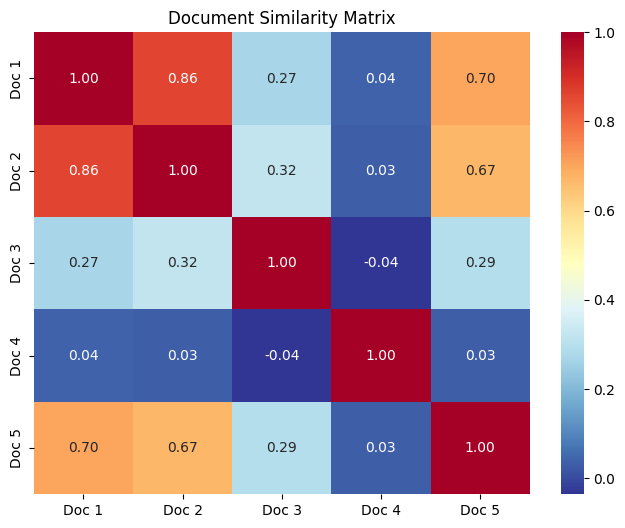

Document reference:
Doc 1: Python is great for programming
Doc 2: I enjoy coding with Python
Doc 3: Machine learning is fascinating
Doc 4: The weather is sunny today
Doc 5: Data science uses Python


In [ ]:
embeddings = model.encode(documents)
similarity_matrix = cosine_similarity(embeddings)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix,
            annot=True, fmt='.2f',
            cmap='RdYlBu_r',
            xticklabels=[f"Doc {i+1}" for i in range(len(documents))],
            yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
plt.title('Document Similarity Matrix')
plt.show()

print("Document reference:")
for i, doc in enumerate(documents):
    print(f"Doc {i+1}: {doc}")


In [ ]:
class SimpleSearchEngine:
    """Basic document search system"""

    def __init__(self):
        self.documents = []
        self.embeddings = None
        self.model = SentenceTransformer('all-MiniLM-L6-v2')

    def add_documents(self, docs):
        """Add documents to search index"""
        self.documents = docs
        self.embeddings = self.model.encode(docs)

    def search(self, query, top_k=3):
        """Search for similar documents"""
        if not self.documents:
            return []

        query_embedding = self.model.encode([query])
        similarities = cosine_similarity(query_embedding, self.embeddings)[0]

        # Get top results
        top_indices = similarities.argsort()[-top_k:][::-1]

        results = []
        for i, idx in enumerate(top_indices):
            results.append({
                'rank': i + 1,
                'document': self.documents[idx],
                'score': similarities[idx]
            })

        return results

# Create search engine
search_engine = SimpleSearchEngine()

In [ ]:
documents_with_info = [
    {
        'title': 'Python Programming Basics',
        'category': 'Programming',
        'text': 'Python is a high-level programming language known for its simplicity and readability. Great for beginners learning to code.'
    },
    {
        'title': 'Machine Learning Introduction',
        'category': 'AI',
        'text': 'Machine learning enables computers to learn from data without explicit programming. Used in recommendation systems.'
    },
    {
        'title': 'Web Development with Python',
        'category': 'Programming',
        'text': 'Django and Flask are popular Python frameworks for building web applications and APIs.'
    },
    {
        'title': 'Data Science Fundamentals',
        'category': 'Data Science',
        'text': 'Data science combines statistics, programming, and domain knowledge to extract insights from data using Python libraries.'
    }
]

class AdvancedSearchEngine:
    """Search engine with metadata support"""

    def __init__(self):
        self.documents = []
        self.metadata = []
        self.embeddings = None
        self.model = SentenceTransformer('all-MiniLM-L6-v2')

    def add_documents(self, docs_with_metadata):
        """Add documents with their metadata"""
        self.documents = [doc['text'] for doc in docs_with_metadata]
        self.metadata = [{'title': doc['title'], 'category': doc['category']}
                        for doc in docs_with_metadata]
        self.embeddings = self.model.encode(self.documents)

    def search(self, query, top_k=3, category_filter=None):
        """Search with optional category filtering"""
        if not self.documents:
            return []

        query_embedding = self.model.encode([query])
        similarities = cosine_similarity(query_embedding, self.embeddings)[0]

        # Apply category filter
        if category_filter:
            valid_indices = [i for i, meta in enumerate(self.metadata)
                           if meta['category'] == category_filter]
        else:
            valid_indices = list(range(len(self.documents)))

        # Get similarities for valid documents only
        valid_similarities = [(i, similarities[i]) for i in valid_indices]
        valid_similarities.sort(key=lambda x: x[1], reverse=True)

        results = []
        for rank, (idx, score) in enumerate(valid_similarities[:top_k], 1):
            results.append({
                'rank': rank,
                'title': self.metadata[idx]['title'],
                'category': self.metadata[idx]['category'],
                'text': self.documents[idx][:100] + "...",
                'score': score
            })

        return results

# Create advanced search engine
advanced_engine = AdvancedSearchEngine()
advanced_engine.add_documents(documents_with_info)


In [ ]:
test_queries = [
    "Python coding tutorial",
    "artificial intelligence",
    "web development",
    "data analysis"
]

for query in test_queries:
    print(f"\nQuery: '{query}'")
    results = advanced_engine.search(query, top_k=2)

    for result in results:
        print(f"  {result['rank']}. {result['title']} ({result['category']})")
        print(f"     Score: {result['score']:.3f}")



Query: 'Python coding tutorial'
  1. Python Programming Basics (Programming)
     Score: 0.679
  2. Data Science Fundamentals (Data Science)
     Score: 0.418

Query: 'artificial intelligence'
  1. Machine Learning Introduction (AI)
     Score: 0.437
  2. Data Science Fundamentals (Data Science)
     Score: 0.251

Query: 'web development'
  1. Web Development with Python (Programming)
     Score: 0.461
  2. Python Programming Basics (Programming)
     Score: 0.315

Query: 'data analysis'
  1. Data Science Fundamentals (Data Science)
     Score: 0.415
  2. Machine Learning Introduction (AI)
     Score: 0.224


In [ ]:
programming_query = "coding basics"

print(f"Query: '{programming_query}' (all categories)")
all_results = advanced_engine.search(programming_query, top_k=3)
for result in all_results:
    print(f"  {result['title']} ({result['category']})")

print(f"\nQuery: '{programming_query}' (Programming only)")
filtered_results = advanced_engine.search(programming_query, top_k=3,
                                        category_filter="Programming")
for result in filtered_results:
    print(f"  {result['title']} ({result['category']})")


Query: 'coding basics' (all categories)
  Python Programming Basics (Programming)
  Machine Learning Introduction (AI)
  Data Science Fundamentals (Data Science)

Query: 'coding basics' (Programming only)
  Python Programming Basics (Programming)
  Web Development with Python (Programming)


In [ ]:
from sklearn.cluster import KMeans

def cluster_documents(embeddings, n_clusters=2):
    """Group documents by similarity"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    return cluster_labels

# Cluster the documents
clusters = cluster_documents(advanced_engine.embeddings, n_clusters=2)

print("Document clusters:")
for i, (meta, cluster) in enumerate(zip(advanced_engine.metadata, clusters)):
    print(f"  {meta['title']} -> Cluster {cluster + 1}")

# Show cluster composition
for cluster_id in range(2):
    docs_in_cluster = [advanced_engine.metadata[i]['title']
                      for i in range(len(clusters))
                      if clusters[i] == cluster_id]
    print(f"\nCluster {cluster_id + 1}: {docs_in_cluster}")

Document clusters:
  Python Programming Basics -> Cluster 2
  Machine Learning Introduction -> Cluster 1
  Web Development with Python -> Cluster 2
  Data Science Fundamentals -> Cluster 2

Cluster 1: ['Machine Learning Introduction']

Cluster 2: ['Python Programming Basics', 'Web Development with Python', 'Data Science Fundamentals']


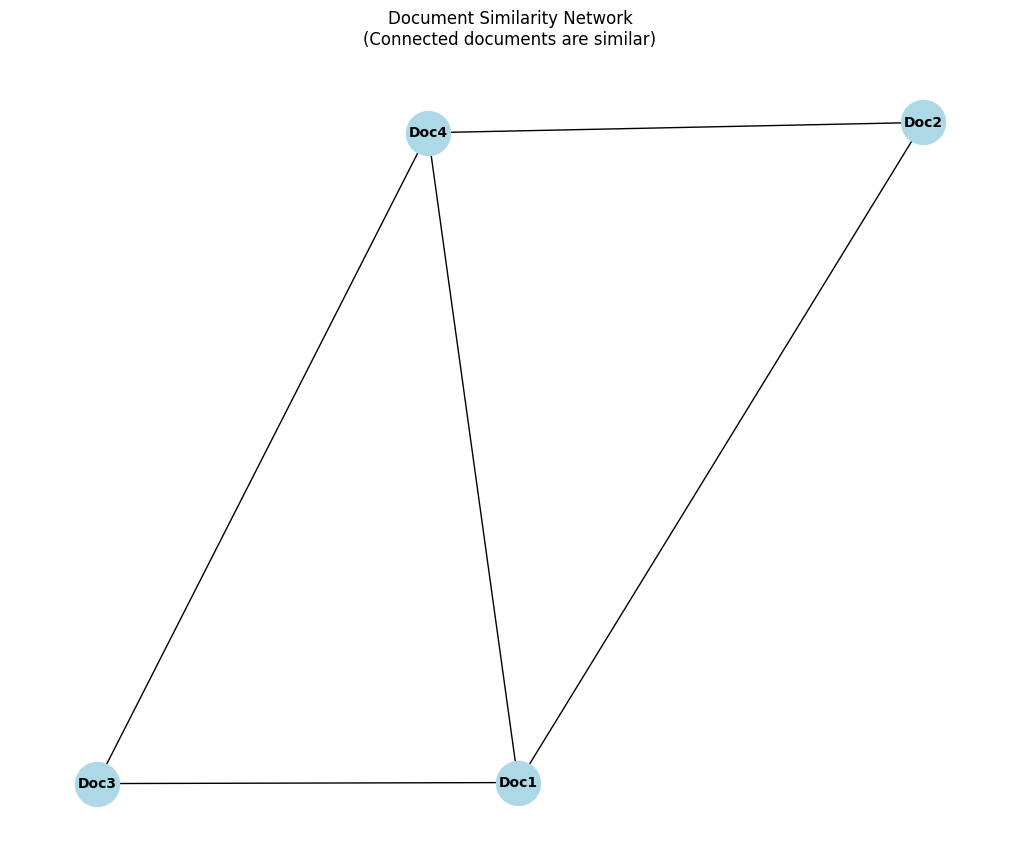

Document reference:
  Doc1: Python Programming Basics
  Doc2: Machine Learning Introduction
  Doc3: Web Development with Python
  Doc4: Data Science Fundamentals


In [ ]:
import networkx as nx

def create_document_network(embeddings, metadata, threshold=0.3):
    """Create network of connected documents"""
    similarity_matrix = cosine_similarity(embeddings)

    # Create graph
    G = nx.Graph()

    # Add nodes
    for i, meta in enumerate(metadata):
        G.add_node(i, title=meta['title'][:20])

    # Add edges for similar documents
    for i in range(len(embeddings)):
        for j in range(i+1, len(embeddings)):
            if similarity_matrix[i][j] > threshold:
                G.add_edge(i, j, weight=similarity_matrix[i][j])

    return G

# Create and visualize network
network = create_document_network(advanced_engine.embeddings,
                                 advanced_engine.metadata,
                                 threshold=0.2)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(network, seed=42)

nx.draw(network, pos,
        with_labels=True,
        labels={i: f"Doc{i+1}" for i in network.nodes()},
        node_color='lightblue',
        node_size=1000,
        font_size=10,
        font_weight='bold')

plt.title('Document Similarity Network\n(Connected documents are similar)')
plt.show()

print("Document reference:")
for i, meta in enumerate(advanced_engine.metadata):
    print(f"  Doc{i+1}: {meta['title']}")


In [ ]:
def evaluate_search_quality(engine, test_cases):
    """Test search accuracy"""

    correct_predictions = 0
    total_tests = 0

    for query, expected_category in test_cases:
        results = engine.search(query, top_k=1)

        if results and results[0]['category'] == expected_category:
            correct_predictions += 1

        total_tests += 1

        print(f"Query: '{query}'")
        print(f"  Expected: {expected_category}")
        if results:
            print(f"  Got: {results[0]['category']}")
            print(f"  Correct: {'Yes' if results[0]['category'] == expected_category else 'No'}")
        print()

    accuracy = correct_predictions / total_tests
    print(f"Search accuracy: {accuracy:.1%} ({correct_predictions}/{total_tests})")
    return accuracy

# Test search quality
test_cases = [
    ("Python web framework", "Programming"),
    ("machine learning algorithms", "AI"),
    ("data visualization", "Data Science"),
    ("programming tutorial", "Programming")
]

accuracy = evaluate_search_quality(advanced_engine, test_cases)

Query: 'Python web framework'
  Expected: Programming
  Got: Programming
  Correct: Yes

Query: 'machine learning algorithms'
  Expected: AI
  Got: AI
  Correct: Yes

Query: 'data visualization'
  Expected: Data Science
  Got: Data Science
  Correct: Yes

Query: 'programming tutorial'
  Expected: Programming
  Got: Programming
  Correct: Yes

Search accuracy: 100.0% (4/4)
